In [5]:
import pandas as pd
import requests 
from pathlib import Path

import nltk
#nltk.download('vader_lexicon') # one time only
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_headlines_from_newsapi():
    
    # news api
    # following query parameters are used
    # source, sortBy and apiKey
    query_params = {
      #"source": "bbc-news",
      "country":'us',
      "sortBy": "top",
      "apiKey": "408bc0e41ad1474581aadc918b65e44e"
    }
    main_url = " https://newsapi.org/v2/top-headlines"
 
    # fetching data in json format
    res = requests.get(main_url, params=query_params)
    open_news_page = res.json()
 
    # getting all articles in a string article . actually a DICT
    article = open_news_page["articles"]
    
    df = pd.DataFrame(article)
    
    return df

In [8]:
def get_sentiments_from_newsapi():
    vader = SentimentIntensityAnalyzer() # or whatever you want to call it


   # df = pd.read_csv('wsj_headlines.csv')
    df = df.drop(columns=['Unnamed: 0'])

    df['scores'] = df['Headline'].apply(lambda headline: vader.polarity_scores(headline))
    df['scores'] = df['scores'].apply(lambda x : x['compound'])

    df = df.groupby(by='Date').mean()

    df ['sentiment'] = df['scores'].apply(lambda x: 'pos' if x > 0 else 'neg' if x < 0 else 'neutral')

    return df

NameError: name 'df' is not defined

In [28]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(customdata = 
            domain = {'x': [0, .75], 'y': [0, .75]},
            mode = 'gauge+number',
            value = ,
            gauge = {
                'axis': {'range': [100, 1200 ], 
                'tickcolor':'blueviolet'},
                'bar': {'color': 'blue'}}, 
            title = {'text': 'Current Sentiment'}))

SyntaxError: invalid syntax (2134770555.py, line 4)

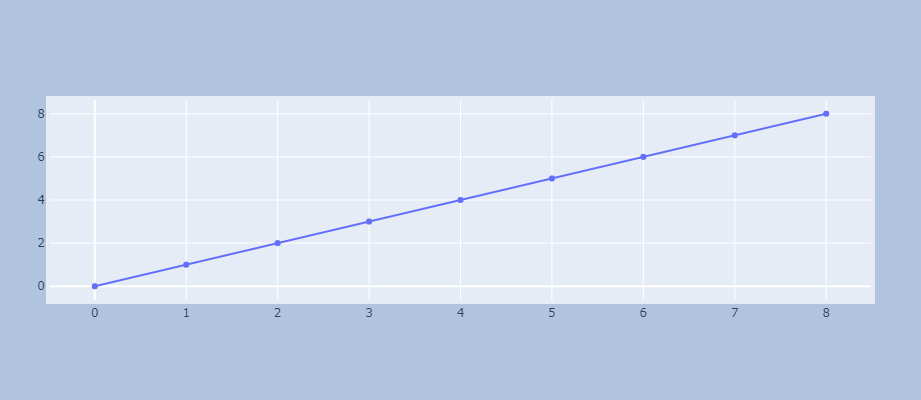

In [27]:
fig.update_layout(
    autosize=False,
    width=400,
    height=400,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

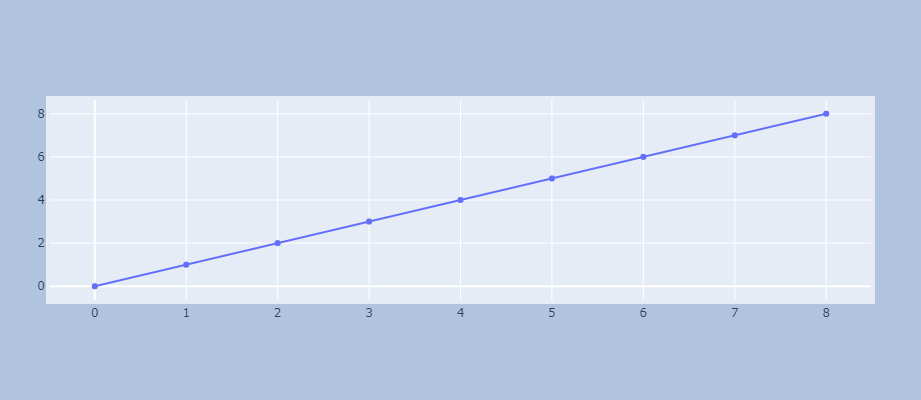

In [26]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 2, 3, 4, 5, 6, 7, 8]
))

fig.update_layout(
    autosize=False,
    width=400,
    height=400,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()